# IMPORT LIBRARIES

In [46]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt # Intermediate Visualization
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns # Advanced Vizualization

# DATA PREPARATION

## Order of Seasonal Buyer

In [47]:
dfob_seasonal = pd.read_pickle('../2. clustering/pickles/dfob_cl_0_seasonal.pkl')
dfob_seasonal.head()

,buyer_id,last_transaction,recency_day,order_freq,gmv,aov,revenue,voucher_used,voucher_val,seller_count,num_of_seller_province,num_of_seller_city,cluster,cluster_name
4,631a514e7255a77e0e6eb785,2023-09-26,97,1,781000,7.810000e+05,5857,0,0.0,1,1,1,0,Seasonal Buyer
6,631a51507255a77e0e6eb83a,2023-09-25,98,2,18205664,9.102832e+06,136542,0,0.0,2,1,2,0,Seasonal Buyer
18,631a515d7255a77e0e6ebcfb,2023-09-13,110,6,89978350,1.499639e+07,674836,0,0.0,2,2,2,0,Seasonal Buyer
24,631a51627255a77e0e6ebedf,2023-10-13,80,4,147922665,3.698067e+07,1109419,0,0.0,2,1,1,0,Seasonal Buyer
25,631a51677255a77e0e6ec0ba,2023-08-19,135,2,13244000,6.622000e+06,99330,0,0.0,1,1,1,0,Seasonal Buyer


In [48]:
dfob_seasonal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3330 entries, 4 to 12807
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   buyer_id                3330 non-null   object        
 1   last_transaction        3330 non-null   datetime64[ns]
 2   recency_day             3330 non-null   int64         
 3   order_freq              3330 non-null   int64         
 4   gmv                     3330 non-null   int64         
 5   aov                     3330 non-null   float64       
 6   revenue                 3330 non-null   int64         
 7   voucher_used            3330 non-null   int64         
 8   voucher_val             3330 non-null   float64       
 9   seller_count            3330 non-null   int64         
 10  num_of_seller_province  3330 non-null   int64         
 11  num_of_seller_city      3330 non-null   int64         
 12  cluster                 3330 non-null   int32       

In [49]:
buyer_id_seasonal = set(dfob_seasonal['buyer_id'])
len(buyer_id_seasonal)

3330

## All Order (2023)

In [50]:
dfo = pd.read_csv('../__dataset/order.csv')

C:\Users\stamp\AppData\Local\Temp\ipykernel_10672\3024604005.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  dfo = pd.read_csv('../__dataset/order.csv')


In [51]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159133 entries, 0 to 159132
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   po_number            159133 non-null  object 
 1   transaction_date     159133 non-null  object 
 2   order_address_id     159133 non-null  int64  
 3   order_status         159133 non-null  object 
 4   payment_group        159133 non-null  object 
 5   payment_method       159133 non-null  object 
 6   shipping_agency      159133 non-null  object 
 7   shipping_cost        159133 non-null  int64  
 8   total_project_value  159133 non-null  int64  
 9   voucher_val          68399 non-null   float64
 10  voucher_code         5160 non-null    object 
 11  revenue              159133 non-null  int64  
 12  seller_id            159127 non-null  object 
 13  seller_category      159127 non-null  object 
 14  buyer_id             159133 non-null  object 
dtypes: float64(1), in

In [52]:
dfo

,po_number,transaction_date,order_address_id,order_status,payment_group,payment_method,shipping_agency,shipping_cost,total_project_value,voucher_val,voucher_code,revenue,seller_id,seller_category,buyer_id
0,PO-2023-12-12-8804434,2023-12-12,463776,Selesai,TOP,mandiriva,Kurir Pribadi,0,53280000,NaN,NaN,399600,NaN,NaN,631a5aafaa3096cbda250540
1,PO-2023-10-11-4866339,2023-10-11,426155,Selesai,TOP,mps-briva,Kurir Pribadi,0,78775501,NaN,NaN,590816,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
2,PO-2023-12-08-7257980,2023-12-08,461137,Dibatalkan,TOP,mps-briva,Kurir Pribadi,0,93125670,NaN,NaN,698442,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
3,PO-2023-04-18-108977,2023-04-18,304802,Selesai,TOP,mps-briva,Kurir Pribadi,0,33300000,NaN,NaN,249750,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
4,PO-2023-12-13-1031978,2023-12-13,465248,Selesai,TOP,mandiri_va_billing_fixed,self,0,331890000,0.0,NaN,1659450,631a50655b9755003d24d78a,Kecil,631a56248755a8a9895e1b31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159128,PO-2023-06-16-128661,2023-06-16,140572,Selesai,Direct,BTNATM,self,0,207500,0.0,NaN,1556,63a94e7cd2c84f87b7e67217,Mikro,631a5b21aa3096cbda2529b2
159129,PO-2023-11-30-4342388,2023-11-30,455045,Selesai,Direct,QREN,biteship_jnt,9000,59000,0.0,NaN,442,63aa70cbcb47446d5bdef77a,Mikro,63341acf3d78e58aa0429c8e
159130,PO-2023-06-07-123774,2023-06-07,108108,Ditolak Penjual,Direct,bni_ecoll_va,biteship_sicepat,42000,142000,0.0,NaN,1065,63aa720fcb47446d5bdf1413,Mikro,63aa9cd8e0c8172b92738dfd
159131,PO-2023-07-21-143881,2023-07-21,293510,Selesai,Direct,QREN,self,0,6500,0.0,NaN,48,63aa832bcb47446d5be0c3dd,Mikro,63ac321ef2bdefdb4a42878e


## Filter by buyer_id (only for Seasonal Buyer)

In [53]:
dfo_buyer_seasonal = dfo[dfo['buyer_id'].isin(buyer_id_seasonal)]

In [54]:
len(dfo_buyer_seasonal)

7387

In [55]:
dfo_buyer_seasonal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7387 entries, 37 to 159123
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   po_number            7387 non-null   object 
 1   transaction_date     7387 non-null   object 
 2   order_address_id     7387 non-null   int64  
 3   order_status         7387 non-null   object 
 4   payment_group        7387 non-null   object 
 5   payment_method       7387 non-null   object 
 6   shipping_agency      7387 non-null   object 
 7   shipping_cost        7387 non-null   int64  
 8   total_project_value  7387 non-null   int64  
 9   voucher_val          5213 non-null   float64
 10  voucher_code         1799 non-null   object 
 11  revenue              7387 non-null   int64  
 12  seller_id            7387 non-null   object 
 13  seller_category      7387 non-null   object 
 14  buyer_id             7387 non-null   object 
dtypes: float64(1), int64(4), object(10)
memo

In [56]:
dfo_buyer_seasonal.head()

,po_number,transaction_date,order_address_id,order_status,payment_group,payment_method,shipping_agency,shipping_cost,total_project_value,voucher_val,voucher_code,revenue,seller_id,seller_category,buyer_id
37,PO-2023-10-08-6853285,2023-10-08,423869,Selesai,TOP,mandiri_va_billing_fixed,self,0,65678220,NaN,NaN,492586,631a506a5b9755003d24e06d,Kecil,6323e35d9f783940afa79ecd
228,PO-2023-06-15-128357,2023-06-15,42929,Selesai,TOP,mandiriva,Kurir Pribadi,0,308000000,NaN,NaN,1540000,631a50775b9755003d24f91e,Kecil,631a54127255a77e0e6fa924
349,PO-2023-08-11-153981,2023-08-11,292443,Selesai,TOP,mps-bniva,Kurir Pribadi,0,109335000,NaN,NaN,820012,631a50795b9755003d24fafa,Kecil,631a68a67476cace4539e663
350,PO-2023-08-04-150664,2023-08-04,251812,Selesai,TOP,mps-bniva,Kurir Pribadi,0,108613500,NaN,NaN,814601,631a50795b9755003d24fafa,Kecil,631a68a67476cace4539e663
579,PO-2023-06-28-133588,2023-06-28,146619,Selesai,TOP,mandiriva,Kurir Pribadi,0,109998075,NaN,NaN,824985,631a507b5b9755003d24fc34,Menengah,631a5b77aa3096cbda253eef


In [57]:
# Convert 'transaction_date' column to datetime using .loc to avoid the warning
dfo_buyer_seasonal.loc[:, 'transaction_date'] = pd.to_datetime(dfo_buyer_seasonal['transaction_date'])

In [58]:
dfo_buyer_seasonal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7387 entries, 37 to 159123
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   po_number            7387 non-null   object 
 1   transaction_date     7387 non-null   object 
 2   order_address_id     7387 non-null   int64  
 3   order_status         7387 non-null   object 
 4   payment_group        7387 non-null   object 
 5   payment_method       7387 non-null   object 
 6   shipping_agency      7387 non-null   object 
 7   shipping_cost        7387 non-null   int64  
 8   total_project_value  7387 non-null   int64  
 9   voucher_val          5213 non-null   float64
 10  voucher_code         1799 non-null   object 
 11  revenue              7387 non-null   int64  
 12  seller_id            7387 non-null   object 
 13  seller_category      7387 non-null   object 
 14  buyer_id             7387 non-null   object 
dtypes: float64(1), int64(4), object(10)
memo

In [59]:
dfo_buyer_seasonal.head()

,po_number,transaction_date,order_address_id,order_status,payment_group,payment_method,shipping_agency,shipping_cost,total_project_value,voucher_val,voucher_code,revenue,seller_id,seller_category,buyer_id
37,PO-2023-10-08-6853285,2023-10-08 00:00:00,423869,Selesai,TOP,mandiri_va_billing_fixed,self,0,65678220,NaN,NaN,492586,631a506a5b9755003d24e06d,Kecil,6323e35d9f783940afa79ecd
228,PO-2023-06-15-128357,2023-06-15 00:00:00,42929,Selesai,TOP,mandiriva,Kurir Pribadi,0,308000000,NaN,NaN,1540000,631a50775b9755003d24f91e,Kecil,631a54127255a77e0e6fa924
349,PO-2023-08-11-153981,2023-08-11 00:00:00,292443,Selesai,TOP,mps-bniva,Kurir Pribadi,0,109335000,NaN,NaN,820012,631a50795b9755003d24fafa,Kecil,631a68a67476cace4539e663
350,PO-2023-08-04-150664,2023-08-04 00:00:00,251812,Selesai,TOP,mps-bniva,Kurir Pribadi,0,108613500,NaN,NaN,814601,631a50795b9755003d24fafa,Kecil,631a68a67476cace4539e663
579,PO-2023-06-28-133588,2023-06-28 00:00:00,146619,Selesai,TOP,mandiriva,Kurir Pribadi,0,109998075,NaN,NaN,824985,631a507b5b9755003d24fc34,Menengah,631a5b77aa3096cbda253eef


## Cohort data

In [60]:
data = dfo_buyer_seasonal.copy()

In [61]:
data['current_month'] = pd.to_datetime(data['transaction_date']).dt.year.map(str) \
                                 + "-" + pd.to_datetime(data['transaction_date']) \
                                 .dt.month.map(str) + "-" '01'

data['current_month'] = pd.to_datetime(data['current_month']).dt.date

In [62]:
data[['order_address_id','buyer_id','transaction_date','current_month']].head(10)

,order_address_id,buyer_id,transaction_date,current_month
37,423869,6323e35d9f783940afa79ecd,2023-10-08 00:00:00,2023-10-01
228,42929,631a54127255a77e0e6fa924,2023-06-15 00:00:00,2023-06-01
349,292443,631a68a67476cace4539e663,2023-08-11 00:00:00,2023-08-01
350,251812,631a68a67476cace4539e663,2023-08-04 00:00:00,2023-08-01
579,146619,631a5b77aa3096cbda253eef,2023-06-28 00:00:00,2023-06-01
584,183453,631a5b77aa3096cbda253eef,2023-02-22 00:00:00,2023-02-01
585,162951,631a5b77aa3096cbda253eef,2023-07-04 00:00:00,2023-07-01
673,240203,631a79df7476cace4540dc50,2023-01-03 00:00:00,2023-01-01
715,201983,631a79f87476cace4540e5f9,2023-06-13 00:00:00,2023-06-01
777,421301,639828d350f233236cc33662,2023-10-05 00:00:00,2023-10-01


In [63]:
data["cohort_month"] = data.groupby("buyer_id")["current_month"].transform("min")

In [64]:
data[['order_address_id','buyer_id','transaction_date','current_month','cohort_month']].head(10)

,order_address_id,buyer_id,transaction_date,current_month,cohort_month
37,423869,6323e35d9f783940afa79ecd,2023-10-08 00:00:00,2023-10-01,2023-10-01
228,42929,631a54127255a77e0e6fa924,2023-06-15 00:00:00,2023-06-01,2023-01-01
349,292443,631a68a67476cace4539e663,2023-08-11 00:00:00,2023-08-01,2023-08-01
350,251812,631a68a67476cace4539e663,2023-08-04 00:00:00,2023-08-01,2023-08-01
579,146619,631a5b77aa3096cbda253eef,2023-06-28 00:00:00,2023-06-01,2023-01-01
584,183453,631a5b77aa3096cbda253eef,2023-02-22 00:00:00,2023-02-01,2023-01-01
585,162951,631a5b77aa3096cbda253eef,2023-07-04 00:00:00,2023-07-01,2023-01-01
673,240203,631a79df7476cace4540dc50,2023-01-03 00:00:00,2023-01-01,2023-01-01
715,201983,631a79f87476cace4540e5f9,2023-06-13 00:00:00,2023-06-01,2023-05-01
777,421301,639828d350f233236cc33662,2023-10-05 00:00:00,2023-10-01,2023-10-01


In [65]:
def months_diff(df, col1, col2):
    current_month = pd.to_datetime(data[col1]).dt.month
    cohort_month = pd.to_datetime(data[col2]).dt.month
    return current_month - cohort_month

data['months_diff'] = months_diff(data, 'current_month', 'cohort_month')

In [66]:
data[['order_address_id','buyer_id','transaction_date','current_month','cohort_month', 'months_diff']].head(10)

,order_address_id,buyer_id,transaction_date,current_month,cohort_month,months_diff
37,423869,6323e35d9f783940afa79ecd,2023-10-08 00:00:00,2023-10-01,2023-10-01,0
228,42929,631a54127255a77e0e6fa924,2023-06-15 00:00:00,2023-06-01,2023-01-01,5
349,292443,631a68a67476cace4539e663,2023-08-11 00:00:00,2023-08-01,2023-08-01,0
350,251812,631a68a67476cace4539e663,2023-08-04 00:00:00,2023-08-01,2023-08-01,0
579,146619,631a5b77aa3096cbda253eef,2023-06-28 00:00:00,2023-06-01,2023-01-01,5
584,183453,631a5b77aa3096cbda253eef,2023-02-22 00:00:00,2023-02-01,2023-01-01,1
585,162951,631a5b77aa3096cbda253eef,2023-07-04 00:00:00,2023-07-01,2023-01-01,6
673,240203,631a79df7476cace4540dc50,2023-01-03 00:00:00,2023-01-01,2023-01-01,0
715,201983,631a79f87476cace4540e5f9,2023-06-13 00:00:00,2023-06-01,2023-05-01,1
777,421301,639828d350f233236cc33662,2023-10-05 00:00:00,2023-10-01,2023-10-01,0


In [67]:
def cohort_index(df, col1):
    return data[col1]

data['cohort_index'] = cohort_index(data, 'months_diff')

In [68]:
data[['order_address_id','buyer_id','transaction_date','current_month','cohort_month', 'months_diff', 'cohort_index']].head(10)

,order_address_id,buyer_id,transaction_date,current_month,cohort_month,months_diff,cohort_index
37,423869,6323e35d9f783940afa79ecd,2023-10-08 00:00:00,2023-10-01,2023-10-01,0,0
228,42929,631a54127255a77e0e6fa924,2023-06-15 00:00:00,2023-06-01,2023-01-01,5,5
349,292443,631a68a67476cace4539e663,2023-08-11 00:00:00,2023-08-01,2023-08-01,0,0
350,251812,631a68a67476cace4539e663,2023-08-04 00:00:00,2023-08-01,2023-08-01,0,0
579,146619,631a5b77aa3096cbda253eef,2023-06-28 00:00:00,2023-06-01,2023-01-01,5,5
584,183453,631a5b77aa3096cbda253eef,2023-02-22 00:00:00,2023-02-01,2023-01-01,1,1
585,162951,631a5b77aa3096cbda253eef,2023-07-04 00:00:00,2023-07-01,2023-01-01,6,6
673,240203,631a79df7476cace4540dc50,2023-01-03 00:00:00,2023-01-01,2023-01-01,0,0
715,201983,631a79f87476cace4540e5f9,2023-06-13 00:00:00,2023-06-01,2023-05-01,1,1
777,421301,639828d350f233236cc33662,2023-10-05 00:00:00,2023-10-01,2023-10-01,0,0


In [69]:
data['cohort_month'] = pd.to_datetime(data['cohort_month']).dt.strftime('%Y-%m')
data['current_month'] = pd.to_datetime(data['current_month']).dt.strftime('%Y-%m')

In [70]:
data[['order_address_id','buyer_id','transaction_date','current_month','cohort_month', 'months_diff', 'cohort_index']].head(10)

,order_address_id,buyer_id,transaction_date,current_month,cohort_month,months_diff,cohort_index
37,423869,6323e35d9f783940afa79ecd,2023-10-08 00:00:00,2023-10,2023-10,0,0
228,42929,631a54127255a77e0e6fa924,2023-06-15 00:00:00,2023-06,2023-01,5,5
349,292443,631a68a67476cace4539e663,2023-08-11 00:00:00,2023-08,2023-08,0,0
350,251812,631a68a67476cace4539e663,2023-08-04 00:00:00,2023-08,2023-08,0,0
579,146619,631a5b77aa3096cbda253eef,2023-06-28 00:00:00,2023-06,2023-01,5,5
584,183453,631a5b77aa3096cbda253eef,2023-02-22 00:00:00,2023-02,2023-01,1,1
585,162951,631a5b77aa3096cbda253eef,2023-07-04 00:00:00,2023-07,2023-01,6,6
673,240203,631a79df7476cace4540dc50,2023-01-03 00:00:00,2023-01,2023-01,0,0
715,201983,631a79f87476cace4540e5f9,2023-06-13 00:00:00,2023-06,2023-05,1,1
777,421301,639828d350f233236cc33662,2023-10-05 00:00:00,2023-10,2023-10,0,0


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7387 entries, 37 to 159123
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   po_number            7387 non-null   object 
 1   transaction_date     7387 non-null   object 
 2   order_address_id     7387 non-null   int64  
 3   order_status         7387 non-null   object 
 4   payment_group        7387 non-null   object 
 5   payment_method       7387 non-null   object 
 6   shipping_agency      7387 non-null   object 
 7   shipping_cost        7387 non-null   int64  
 8   total_project_value  7387 non-null   int64  
 9   voucher_val          5213 non-null   float64
 10  voucher_code         1799 non-null   object 
 11  revenue              7387 non-null   int64  
 12  seller_id            7387 non-null   object 
 13  seller_category      7387 non-null   object 
 14  buyer_id             7387 non-null   object 
 15  current_month        7387 non-null   obj

# CALCULATE COHORT SIZE

In [72]:
cohort_counts = data.groupby(['cohort_month', 'cohort_index'])['buyer_id'].nunique()

cohort_counts_data = cohort_counts.to_frame().rename(columns={'buyer_id':'buyers'}) \
                                .sort_values(by=['cohort_month', 'cohort_index'])

In [73]:
cohort_counts_data

buyers
cohort_month cohort_index        
2023-01      0                273
             1                 45
             2                 85
             3                 66
             4                 57
             5                 86
             6                101
             7                108
             8                108
             9                135
2023-02      0                228
             1                 70
             2                 53
             3                 47
             4                 73
             5                 85
             6                 97
             7                 97
             8                116
2023-03      0                268
             1                 59
             2                 39
             3                 65
             4                 88
             5                102
             6                100
             7                114
2023-04      0                196
             1                 34
             2                 49
             3                 66
             4                 67
             5                 83
             6                 75
2023-05      0                123
             1                 21
             2                 35
             3                 45
             4                 36
             5                 48
2023-06      0                230
             1                 59
             2                 55
             3                 49
             4                 70
2023-07      0                560
             1                 46
             2                 42
             3                 56
2023-08      0                465
             1                 46
             2                 47
2023-09      0                466
             1                 35
2023-10      0                521

# CALCULATE RETENTION RATE

In [74]:
cohort_counts_data['retention_rate'] = cohort_counts_data['buyers'] / cohort_counts_data.groupby(["cohort_month"])["buyers"].transform("max")

In [75]:
cohort_counts_data

buyers  retention_rate
cohort_month cohort_index                        
2023-01      0                273        1.000000
             1                 45        0.164835
             2                 85        0.311355
             3                 66        0.241758
             4                 57        0.208791
             5                 86        0.315018
             6                101        0.369963
             7                108        0.395604
             8                108        0.395604
             9                135        0.494505
2023-02      0                228        1.000000
             1                 70        0.307018
             2                 53        0.232456
             3                 47        0.206140
             4                 73        0.320175
             5                 85        0.372807
             6                 97        0.425439
             7                 97        0.425439
             8                116        0.508772
2023-03      0                268        1.000000
             1                 59        0.220149
             2                 39        0.145522
             3                 65        0.242537
             4                 88        0.328358
             5                102        0.380597
             6                100        0.373134
             7                114        0.425373
2023-04      0                196        1.000000
             1                 34        0.173469
             2                 49        0.250000
             3                 66        0.336735
             4                 67        0.341837
             5                 83        0.423469
             6                 75        0.382653
2023-05      0                123        1.000000
             1                 21        0.170732
             2                 35        0.284553
             3                 45        0.365854
             4                 36        0.292683
             5                 48        0.390244
2023-06      0                230        1.000000
             1                 59        0.256522
             2                 55        0.239130
             3                 49        0.213043
             4                 70        0.304348
2023-07      0                560        1.000000
             1                 46        0.082143
             2                 42        0.075000
             3                 56        0.100000
2023-08      0                465        1.000000
             1                 46        0.098925
             2                 47        0.101075
2023-09      0                466        1.000000
             1                 35        0.075107
2023-10      0                521        1.000000

# CALCULATE CLV

In [76]:
cohort_clv = data.groupby(['cohort_month', 'cohort_index'])['total_project_value'].sum()

cohort_clv_data = cohort_clv.to_frame().rename(columns={'total_project_value':'clv'}) \
                                .sort_values(by=['cohort_month', 'cohort_index'])

cohort_clv_data['clv_millions'] = cohort_clv_data['clv'] / 1_000_000  # Convert to millions
cohort_clv_data['clv_billions'] = cohort_clv_data['clv'] / 1_000_000_000  # Convert to millions

In [77]:
cohort_clv_data

clv  clv_millions  clv_billions
cohort_month cohort_index                                        
2023-01      0             2489072668   2489.072668      2.489073
             1              453634698    453.634698      0.453635
             2             1158787185   1158.787185      1.158787
             3              776179275    776.179275      0.776179
             4              766113771    766.113771      0.766114
             5             2063927384   2063.927384      2.063927
             6             1526266872   1526.266872      1.526267
             7             1838224521   1838.224521      1.838225
             8             1304535871   1304.535871      1.304536
             9             2006079240   2006.079240      2.006079
2023-02      0             1867143145   1867.143145      1.867143
             1              626387777    626.387777      0.626388
             2              466575890    466.575890      0.466576
             3              327246860    327.246860      0.327247
             4              730984880    730.984880      0.730985
             5              494046060    494.046060      0.494046
             6             1143932880   1143.932880      1.143933
             7             1499626184   1499.626184      1.499626
             8             1069645980   1069.645980      1.069646
2023-03      0             3550881039   3550.881039      3.550881
             1             1092587300   1092.587300      1.092587
             2              470344030    470.344030      0.470344
             3             1399269273   1399.269273      1.399269
             4             1077959722   1077.959722      1.077960
             5             1539975533   1539.975533      1.539976
             6             1460542689   1460.542689      1.460543
             7             1586241061   1586.241061      1.586241
2023-04      0             2236418021   2236.418021      2.236418
             1               85259258     85.259258      0.085259
             2              488700574    488.700574      0.488701
             3              883655688    883.655688      0.883656
             4              332066542    332.066542      0.332067
             5             1529380850   1529.380850      1.529381
             6              659238082    659.238082      0.659238
2023-05      0             1414539321   1414.539321      1.414539
             1              121045009    121.045009      0.121045
             2              251195007    251.195007      0.251195
             3              236445939    236.445939      0.236446
             4              534042610    534.042610      0.534043
             5              928909674    928.909674      0.928910
2023-06      0             1328530966   1328.530966      1.328531
             1              413499115    413.499115      0.413499
             2              557222428    557.222428      0.557222
             3              455635038    455.635038      0.455635
             4              720637521    720.637521      0.720638
2023-07      0             4509967174   4509.967174      4.509967
             1              382471933    382.471933      0.382472
             2              503704937    503.704937      0.503705
             3              706336411    706.336411      0.706336
2023-08      0             2299049110   2299.049110      2.299049
             1              690736437    690.736437      0.690736
             2              262410625    262.410625      0.262411
2023-09      0             8141708997   8141.708997      8.141709
             1              470607904    470.607904      0.470608
2023-10      0             3016175685   3016.175685      3.016176

# CALCULATE ARPU

In [78]:
cohort_arpu = data.groupby(['cohort_month', 'cohort_index'])['buyer_id'].nunique()

total_revenue = data.groupby(['cohort_month', 'cohort_index'])['revenue'].sum()

number_of_buyers = data.groupby(['cohort_month', 'cohort_index'])['buyer_id'].nunique()

arpu = total_revenue / number_of_buyers
arpu_thousands = arpu / 1_000

cohort_arpu_data = cohort_arpu.to_frame().rename(columns={'buyer_id':'buyers'}) \
                    .sort_values(by=['cohort_month', 'cohort_index'])

# Assign ARPU values to 'arpu' column
cohort_arpu_data['arpu'] = arpu.reindex(cohort_arpu_data.index).values

# Assign ARPU values in thousands to 'arpu_thousands' column
cohort_arpu_data['arpu_thousands'] = arpu_thousands.reindex(cohort_arpu_data.index).values

cohort_arpu_data.head(20)

buyers           arpu  arpu_thousands
cohort_month cohort_index                                       
2023-01      0                273   58302.937729       58.302938
             1                 45   75605.400000       75.605400
             2                 85  102245.458824      102.245459
             3                 66   88201.787879       88.201788
             4                 57  100804.157895      100.804158
             5                 86  126667.220930      126.667221
             6                101  113336.287129      113.336287
             7                108  116642.703704      116.642704
             8                108   90592.435185       90.592435
             9                135  111448.466667      111.448467
2023-02      0                228   61418.785088       61.418785
             1                 70   67112.585714       67.112586
             2                 53   66024.471698       66.024472
             3                 47   52219.744681       52.219745
             4                 73   75100.671233       75.100671
             5                 85   43591.905882       43.591906
             6                 97   88447.979381       88.447979
             7                 97   71478.587629       71.478588
             8                116   69157.689655       69.157690
2023-03      0                268   94212.944030       94.212944

In [79]:
cohort_arpu_group = data.groupby(['cohort_month'])['buyer_id'].nunique()

total_revenue = data.groupby(['cohort_month'])['revenue'].sum()

number_of_buyers = data.groupby(['cohort_month'])['buyer_id'].nunique()

arpu = total_revenue / number_of_buyers
arpu_thousands = arpu / 1_000
arpu_millions = arpu / 1_000_000

cohort_arpu_group_data = cohort_arpu_group.to_frame().rename(columns={'buyer_id':'buyers'}) \
                    .sort_values(by=['cohort_month'])

cohort_arpu_group_data['arpu'] = arpu.reindex(cohort_arpu_group_data.index).values

cohort_arpu_group_data['arpu_thousands'] = arpu_thousands.reindex(cohort_arpu_group_data.index).values

cohort_arpu_group_data['arpu_millions'] = arpu_millions.reindex(cohort_arpu_group_data.index).values

cohort_arpu_group_data.head(20)

,buyers,arpu,arpu_thousands,arpu_millions
cohort_month,,,,
2023-01,273,363898.344322,363.898344,0.363898
2023-02,228,251657.100877,251.657101,0.251657
2023-03,268,321653.761194,321.653761,0.321654
2023-04,196,209755.341837,209.755342,0.209755
2023-05,123,201291.837398,201.291837,0.201292
2023-06,230,113331.617391,113.331617,0.113332
2023-07,560,62111.726786,62.111727,0.062112
2023-08,465,51087.767742,51.087768,0.051088
2023-09,466,71492.944206,71.492944,0.071493


# PIVOT TABLE COHORT

In [80]:
cohorts_pivot = cohort_counts_data.pivot_table(index='cohort_month', columns = 'cohort_index', values = 'retention_rate')

In [81]:
cohorts_pivot

cohort_index,0,1,2,3,4,5,6,7,8,9
cohort_month,,,,,,,,,,
2023-01,1.0,0.164835,0.311355,0.241758,0.208791,0.315018,0.369963,0.395604,0.395604,0.494505
2023-02,1.0,0.307018,0.232456,0.206140,0.320175,0.372807,0.425439,0.425439,0.508772,NaN
2023-03,1.0,0.220149,0.145522,0.242537,0.328358,0.380597,0.373134,0.425373,NaN,NaN
2023-04,1.0,0.173469,0.250000,0.336735,0.341837,0.423469,0.382653,NaN,NaN,NaN
2023-05,1.0,0.170732,0.284553,0.365854,0.292683,0.390244,NaN,NaN,NaN,NaN
2023-06,1.0,0.256522,0.239130,0.213043,0.304348,NaN,NaN,NaN,NaN,NaN
2023-07,1.0,0.082143,0.075000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN
2023-08,1.0,0.098925,0.101075,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09,1.0,0.075107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
cohort_counts_size = data.groupby(['cohort_month'])['buyer_id'].nunique()

cohort_counts_size_data = cohort_counts_size.to_frame().rename(columns={'buyer_id':'buyers'}) \
                                .sort_values(by=['cohort_month'])

cohort_counts_size_data

,buyers
cohort_month,
2023-01,273
2023-02,228
2023-03,268
2023-04,196
2023-05,123
2023-06,230
2023-07,560
2023-08,465
2023-09,466


In [83]:
cohorts_clv_pivot = cohort_clv_data.pivot_table(index='cohort_month', columns = 'cohort_index', values = 'clv_billions')

In [84]:
cohorts_clv_pivot

cohort_index,0,1,2,3,4,5,6,7,8,9
cohort_month,,,,,,,,,,
2023-01,2.489073,0.453635,1.158787,0.776179,0.766114,2.063927,1.526267,1.838225,1.304536,2.006079
2023-02,1.867143,0.626388,0.466576,0.327247,0.730985,0.494046,1.143933,1.499626,1.069646,NaN
2023-03,3.550881,1.092587,0.470344,1.399269,1.077960,1.539976,1.460543,1.586241,NaN,NaN
2023-04,2.236418,0.085259,0.488701,0.883656,0.332067,1.529381,0.659238,NaN,NaN,NaN
2023-05,1.414539,0.121045,0.251195,0.236446,0.534043,0.928910,NaN,NaN,NaN,NaN
2023-06,1.328531,0.413499,0.557222,0.455635,0.720638,NaN,NaN,NaN,NaN,NaN
2023-07,4.509967,0.382472,0.503705,0.706336,NaN,NaN,NaN,NaN,NaN,NaN
2023-08,2.299049,0.690736,0.262411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09,8.141709,0.470608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# VISUALIZATION

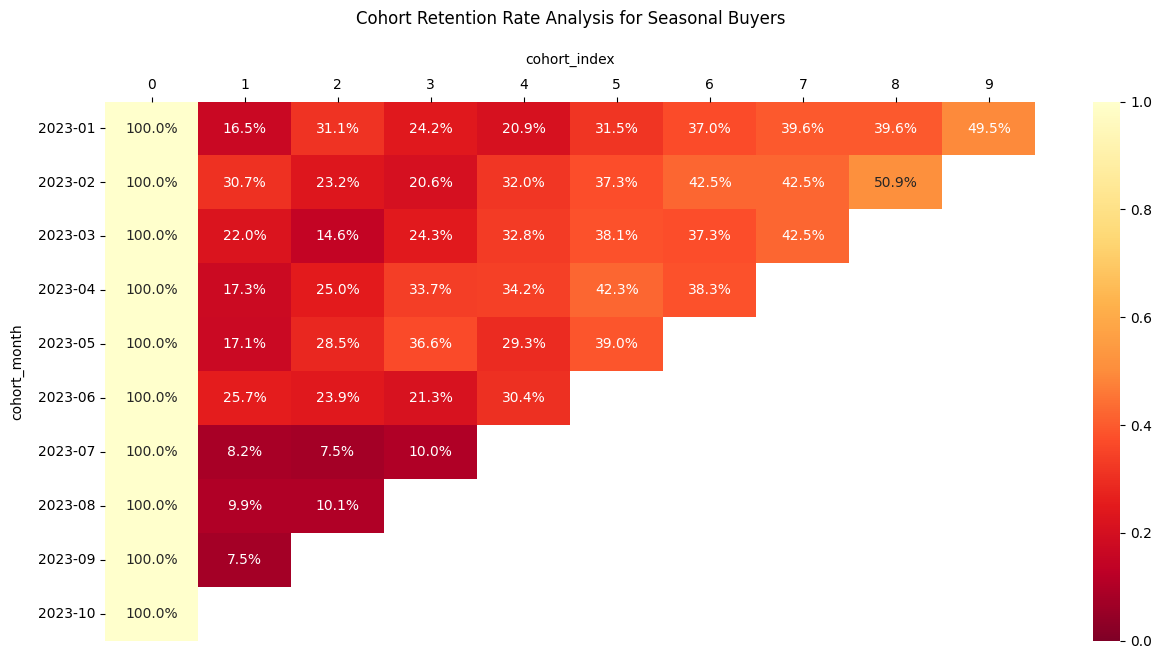

In [85]:
plt.figure(figsize=(15, 7))
heatmap1 = sns.heatmap(data=cohorts_pivot,
                      annot=True,
                      fmt='.1%',
                      vmin=0.0,
                      vmax=1,
                      cmap='YlOrRd_r')

plt.title('Cohort Retention Rate Analysis for Seasonal Buyers\n')

# Move x-axis ticks to the top
heatmap1.xaxis.tick_top()

heatmap1.set_xlabel('cohort_index', labelpad=10)
heatmap1.set_ylabel('cohort_month', labelpad=10)
heatmap1.xaxis.set_label_position('top')

plt.show()

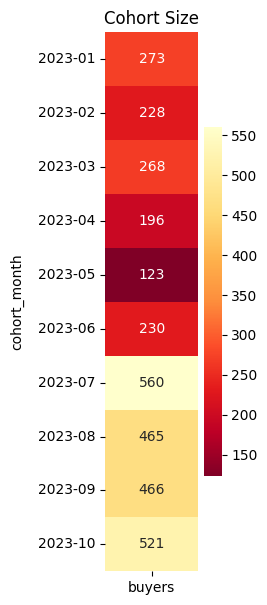

In [86]:
plt.figure(figsize=(1.5, 7))
heatmap2 = sns.heatmap(data=cohort_counts_size_data,
            annot=True, 
            fmt="d",
            cmap="YlOrRd_r")

plt.title('Cohort Size')
plt.ylabel('Cohort Month')

heatmap2.set_ylabel('cohort_month', labelpad=10)

plt.show()

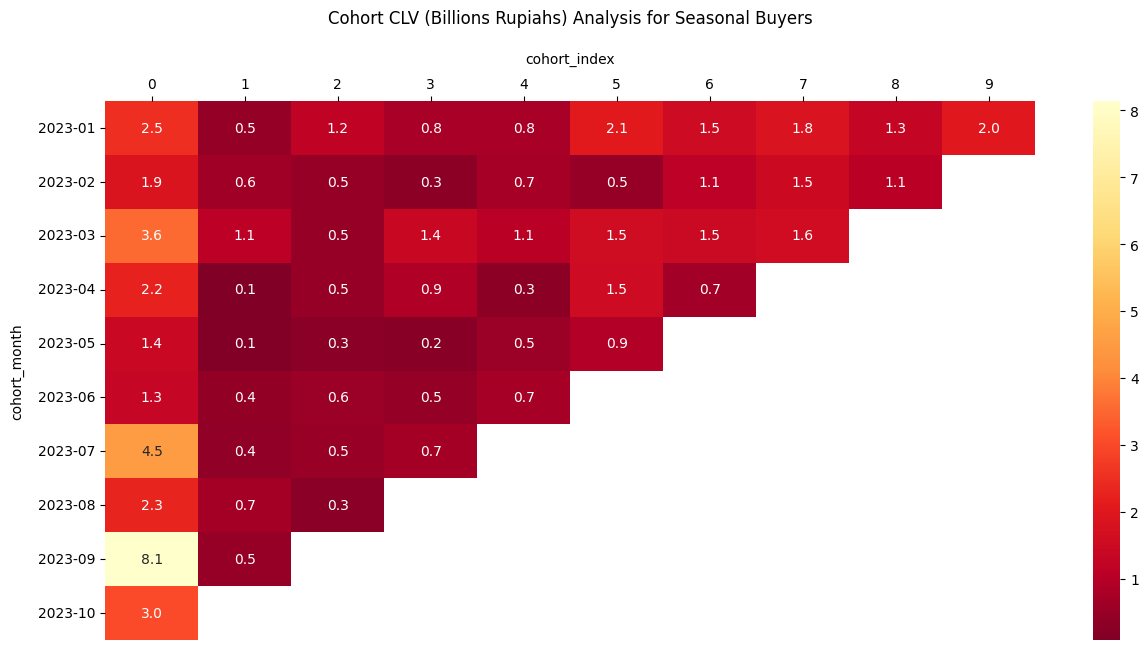

In [87]:
cohorts_clv_pivot = cohort_clv_data.pivot_table(index='cohort_month', columns='cohort_index', values='clv_billions')

plt.figure(figsize=(15, 7))
heatmap3 = sns.heatmap(data=cohorts_clv_pivot,
            annot=True,
            fmt='.1f',  # Format to one decimal place
            cmap='YlOrRd_r')

plt.title('Cohort CLV (Billions Rupiahs) Analysis for Seasonal Buyers\n')

# Move x-axis ticks to the top
heatmap3.xaxis.tick_top()

heatmap3.set_xlabel('cohort_index', labelpad=10)
heatmap3.set_ylabel('cohort_month', labelpad=10)
heatmap3.xaxis.set_label_position('top')

plt.show()

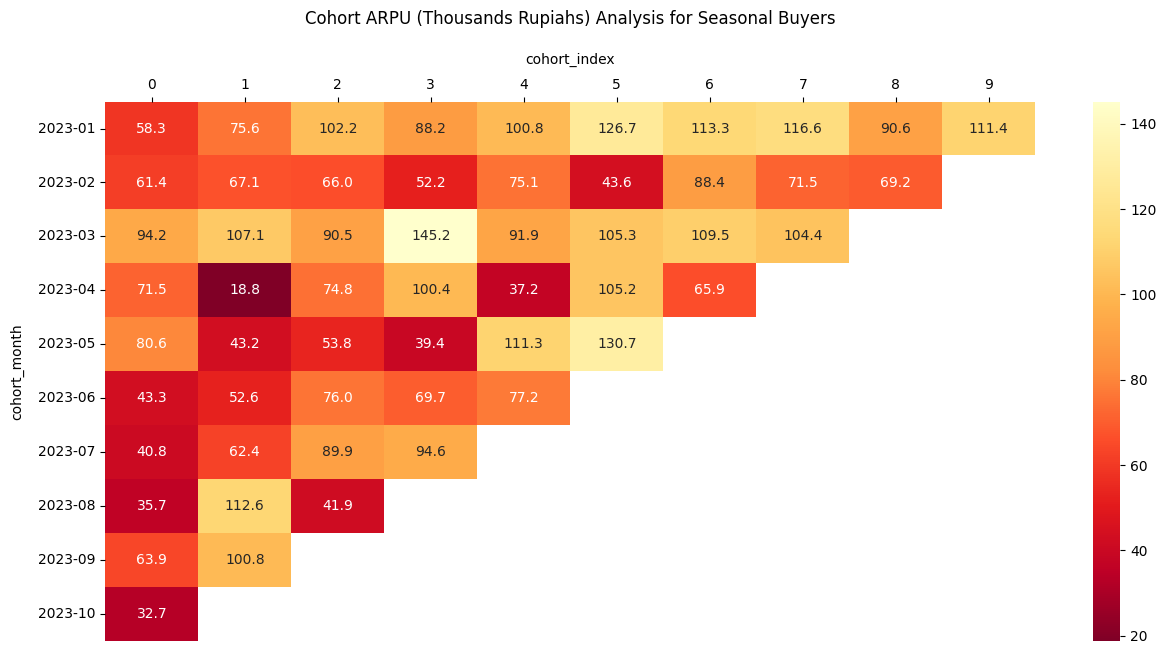

In [88]:
cohorts_arpu_pivot = cohort_arpu_data.pivot_table(index='cohort_month', columns='cohort_index', values='arpu_thousands')

plt.figure(figsize=(15, 7))
heatmap4 = sns.heatmap(data=cohorts_arpu_pivot,
            annot=True,
            fmt='.1f',  # Format to one decimal place
            cmap='YlOrRd_r')

plt.title('Cohort ARPU (Thousands Rupiahs) Analysis for Seasonal Buyers\n')

# Move x-axis ticks to the top
heatmap4.xaxis.tick_top()

heatmap4.set_xlabel('cohort_index', labelpad=10)
heatmap4.set_ylabel('cohort_month', labelpad=10)
heatmap4.xaxis.set_label_position('top')

plt.show()

C:\Users\stamp\AppData\Local\Temp\ipykernel_10672\342840917.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(f'{txt:.2f}', (cohort_month[i], arpu_millions[i]), textcoords="offset points", xytext=(0,10), ha='center')


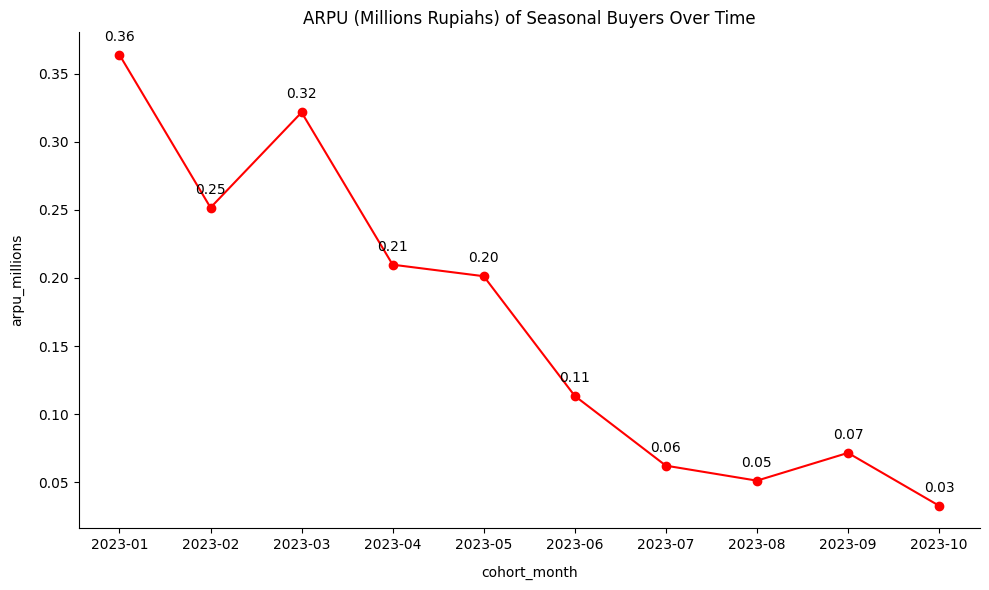

In [89]:
# Extracting data for plotting
cohort_month = cohort_arpu_group_data.index
arpu_millions = cohort_arpu_group_data['arpu_millions']

# Creating the line chart
plt.figure(figsize=(10, 6))
plt.plot(cohort_month, arpu_millions, marker='o', color='red', linestyle='-')

# Adding data labels
for i, txt in enumerate(arpu_millions):
    plt.annotate(f'{txt:.2f}', (cohort_month[i], arpu_millions[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Adding labels and title
plt.title('ARPU (Millions Rupiahs) of Seasonal Buyers Over Time')
plt.xlabel('cohort_month', labelpad=10)
plt.ylabel('arpu_millions', labelpad=10)

# Removing background gridlines
plt.grid(False)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Rotating x-axis labels for better readability
# plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()